# Mixture of Gaussians BEAM Demo

### Step 1: Load all necessary modules and generate the data

directory_path: /Users/andrewyang/Desktop/beam/demo


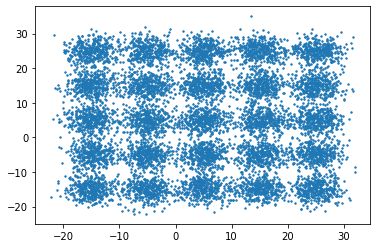

: 

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from beam import BEAM, load
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../')
print("directory_path:", directory_path)

def gaussian_grid(width, height, scale, n_total_samples):
    cov = np.eye(2) * scale
    samples_per_center = int(n_total_samples / (width * height))
    X = []
    for i in range(height):
        for j in range(width):
            mean = np.array([i, j])
            X.append(np.random.multivariate_normal(mean, cov, samples_per_center))
    final = np.vstack(X)
    final[:, 0] -= (height - 1) / 2
    final[:, 1] -= (width - 1) / 2
    return final

X = gaussian_grid(5, 5, 0.05, 10000) * 10 + 5
np.random.shuffle(X)
img = plt.scatter(x=X[:, 0], y=X[:, 1], s=2)

### Step 2: Train the BEAM

In [ ]:
model = BEAM(
    n_vis=2,
    n_hid=20
)
model.fit(
    X = X,
    n_gibbs=1,
    lr=0.01,
    n_epochs=100,
    batch_size=50,
    gamma=0.1,
    gamma_delay=25,
    rng_seed=0,
    fail_tol=8,
    verbose=True,
    checkpoint_path=f'{directory_path}/beam_checkpoints/beam.pth'
)

### Step 3: Visualize the learned distribution

In [ ]:
model = load(f'{directory_path}/rbm_checkpoints/rbm.pth',
                 f'{directory_path}/rbm_checkpoints/rbm.json')
print(model._variance())
samples = model.reconstruct(
    np.zeros((10000, 2)), n_gibbs=200
)
img = plt.scatter(x=samples[:, 0], y=samples[:, 1], s=2)